## Insurance Data Analysis 

In [73]:
import pandas as pd

In [74]:
import seaborn as sns
import numpy as np

In [75]:
insurance_file = "C:\\Users\\Seith Sproule\\Documents\\UNI\\DATA 270\\Case Study\\insurance.csv"
ins_data = pd.read_csv(insurance_file)

### Info About dataset

In [76]:
ins_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [77]:
ins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [78]:
ins_data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

### Making charges value be a monetary value

In [79]:
def money(x):
    return "${:.2f}".format(x)
ins_data['Cost'] = ins_data['charges'].apply(money)

In [80]:
ins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
 7   Cost      1338 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


### How is age related to health care costs?

In [81]:
def pay(x):
    if x <= 15000:
        return "0-15000"
    elif 15000<x<=30000:
        return "15000-30000"
    elif 30000<x<=45000:
        return "30000-45000"
    elif 45000<x<=60000:
        return "45000-60000"
    else:
        return "60000+"
ins_data['payment_group'] = ins_data['charges'].apply(pay)

In [82]:
ins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1338 non-null   int64  
 1   sex            1338 non-null   object 
 2   bmi            1338 non-null   float64
 3   children       1338 non-null   int64  
 4   smoker         1338 non-null   object 
 5   region         1338 non-null   object 
 6   charges        1338 non-null   float64
 7   Cost           1338 non-null   object 
 8   payment_group  1338 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 94.2+ KB


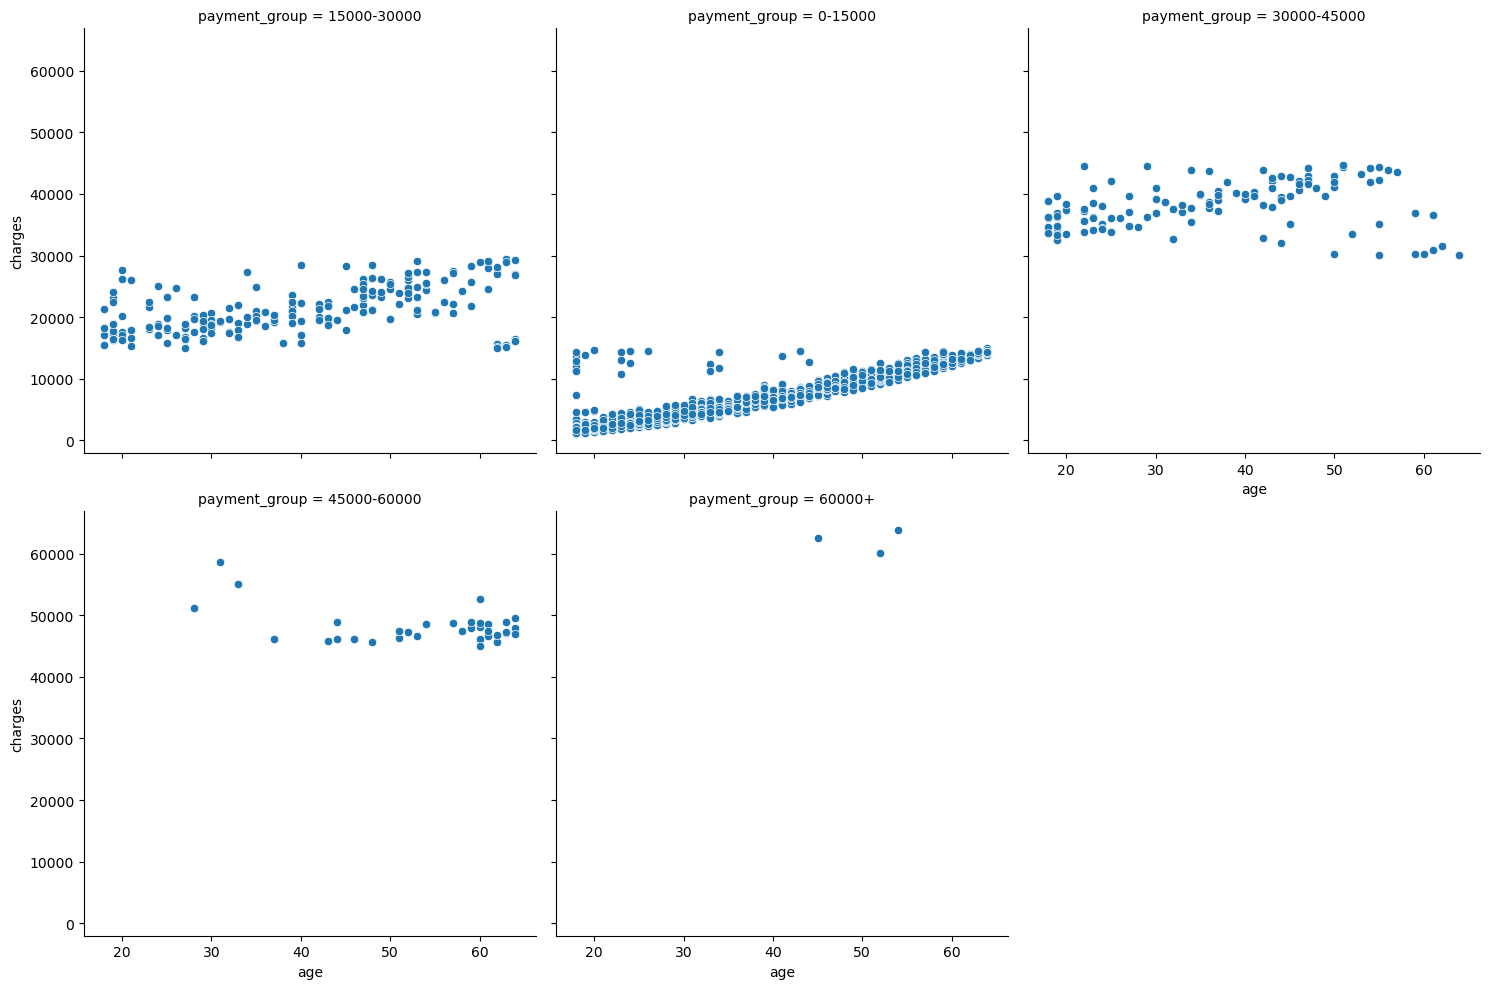

In [83]:
sns.relplot(data = ins_data, kind='scatter', x ='age', y='charges',col='payment_group',col_wrap=3)

In [84]:
# Each chart shows the relations between the age of the patient and the cost per payment group

In [85]:
# The correlation coeffiecents of charges vs age grouped by payment group
ins_data.groupby('payment_group').apply(lambda group: group['charges'].corr(group['age']))

payment_group
0-15000        0.896298
15000-30000    0.490487
30000-45000    0.244312
45000-60000   -0.440629
60000+         0.001761
dtype: float64

### How is number of children related to health care costs?

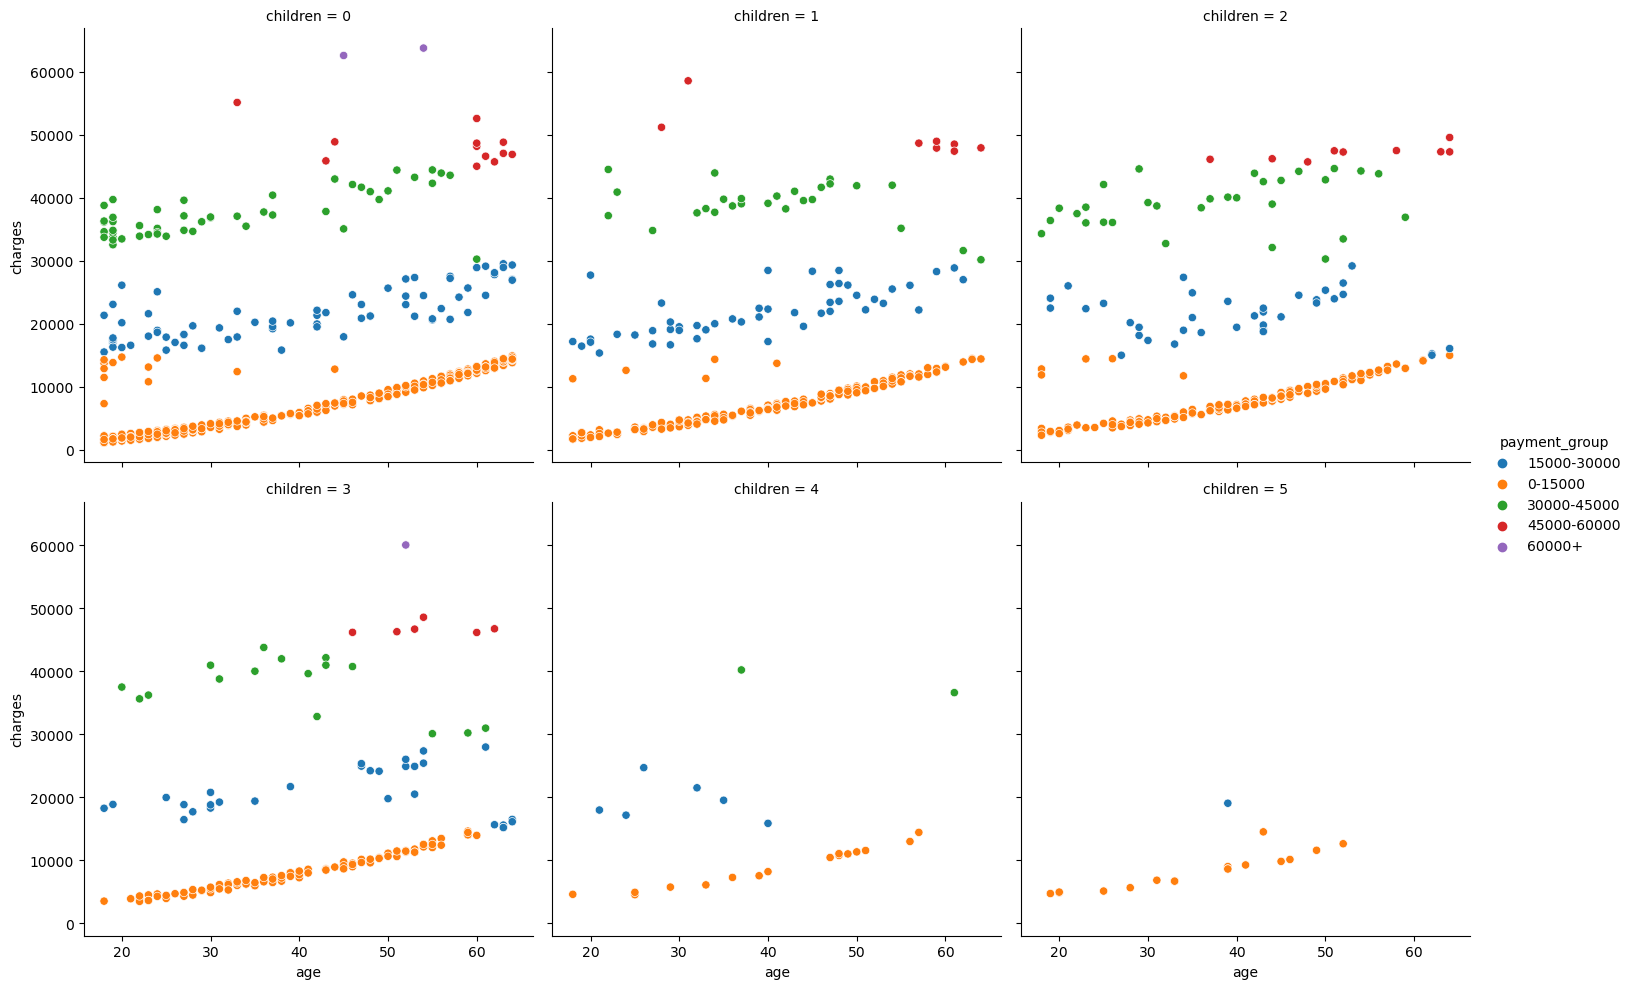

In [86]:
sns.relplot(data = ins_data, kind='scatter', x ='age', y='charges',col='children',col_wrap=3, hue='payment_group')

In [87]:
# Each graph shows the relation between charges and age per number of children. Furthermore each number of children
# is grouped by payment group. 

### How is the number of people distributed by region?

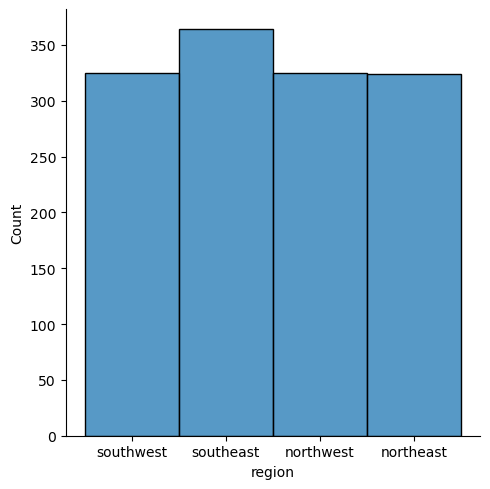

In [88]:
sns.displot(data=ins_data, kind='hist', x='region')

In [89]:
# The histogram shows the distribution of people by region

### Distribution of Number of People by Age

Text(0.5, 1.0, 'Distribution of Number of People by Age')

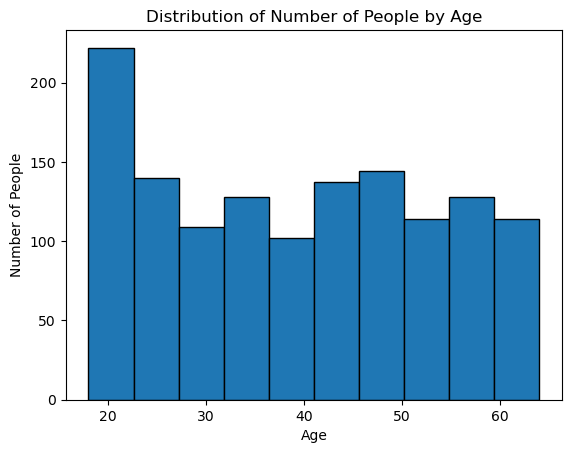

In [90]:
ax = ins_data['age'].plot.hist(bins=10, edgecolor='black')

ax.set_xlabel('Age')
ax.set_ylabel('Number of People')
ax.set_title('Distribution of Number of People by Age')

### Distribution of Charges

Text(0.5, 1.0, 'Distribution of Charges')

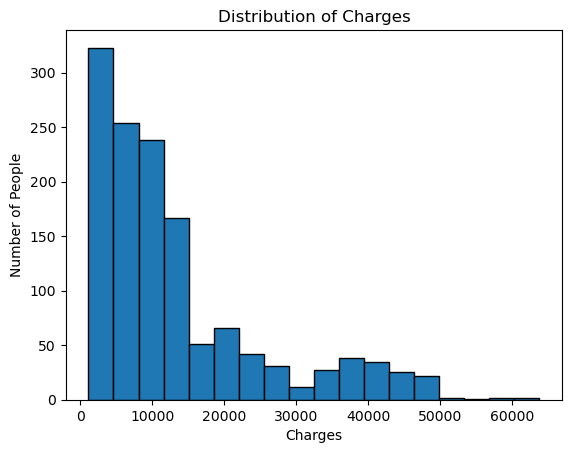

In [91]:
ax = ins_data['charges'].plot.hist(bins=18, edgecolor='black')

ax.set_xlabel('Charges')
ax.set_ylabel('Number of People')
ax.set_title('Distribution of Charges')

### Binning the BMI column by Underwieght, Normal Wieght, Overwieght, and Obese. 

In [92]:
ins_data['BMI_Category'] = pd.cut(ins_data['bmi'],
                                  bins=[0, 18.5, 24.9, 29.9,float('inf')], 
                                  labels=['Underweight', 'Normal Weight', 'Overweight', 'Obese'])
ins_data

,age,sex,bmi,children,smoker,region,charges,Cost,payment_group,BMI_Category
0,19,female,27.900,0,yes,southwest,16884.92400,$16884.92,15000-30000,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,$1725.55,0-15000,Obese
2,28,male,33.000,3,no,southeast,4449.46200,$4449.46,0-15000,Obese
3,33,male,22.705,0,no,northwest,21984.47061,$21984.47,15000-30000,Normal Weight
4,32,male,28.880,0,no,northwest,3866.85520,$3866.86,0-15000,Overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,$10600.55,0-15000,Obese
1334,18,female,31.920,0,no,northeast,2205.98080,$2205.98,0-15000,Obese
1335,18,female,36.850,0,no,southeast,1629.83350,$1629.83,0-15000,Obese
1336,21,female,25.800,0,no,southwest,2007.94500,$2007.94,0-15000,Overweight


### The relation between charges and BMI

<Axes: xlabel='bmi', ylabel='charges'>

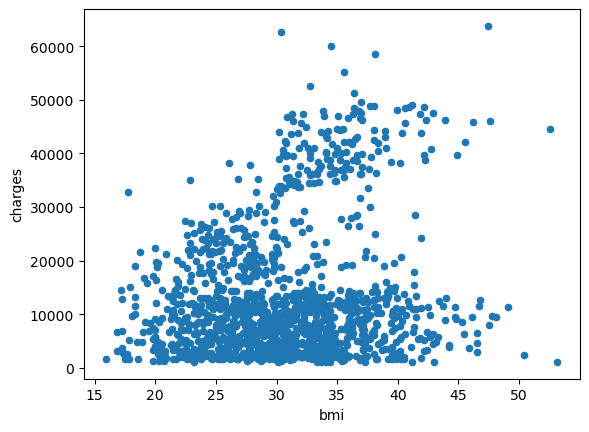

In [93]:
ins_data.plot.scatter(x='bmi',y='charges')

In [94]:
ins_data[['bmi', 'charges']].corr()

,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


In [95]:
#The scatter plot shows the relation of bmi and charges. The correlation coefficient is close to zero so there seems
#to be almost no correlation. 

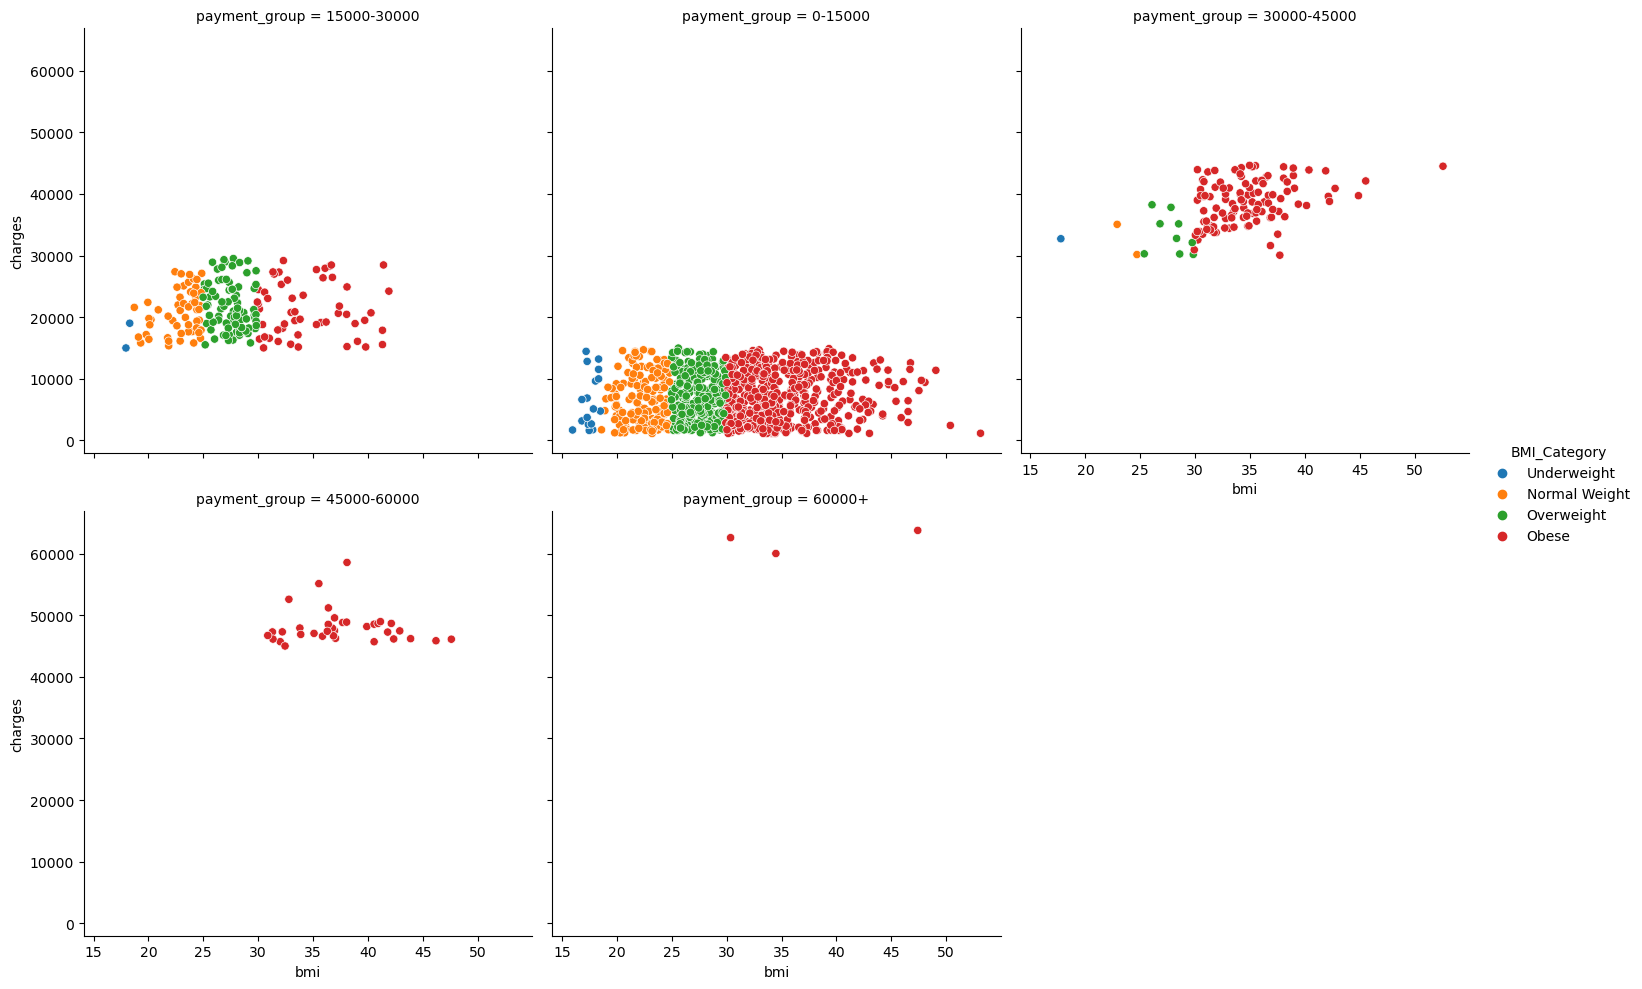

In [96]:
sns.relplot(data=ins_data, kind='scatter', x='bmi', y='charges', hue='BMI_Category', col='payment_group', col_wrap=3)

In [97]:
ins_data.groupby('payment_group').apply(lambda group: group['charges'].corr(group['bmi']))

payment_group
0-15000        0.073263
15000-30000    0.061064
30000-45000    0.469958
45000-60000   -0.066987
60000+         0.566089
dtype: float64

In [98]:
# So by grouping by payment group there still does not seem to be a strong correlation between charges and bmi 

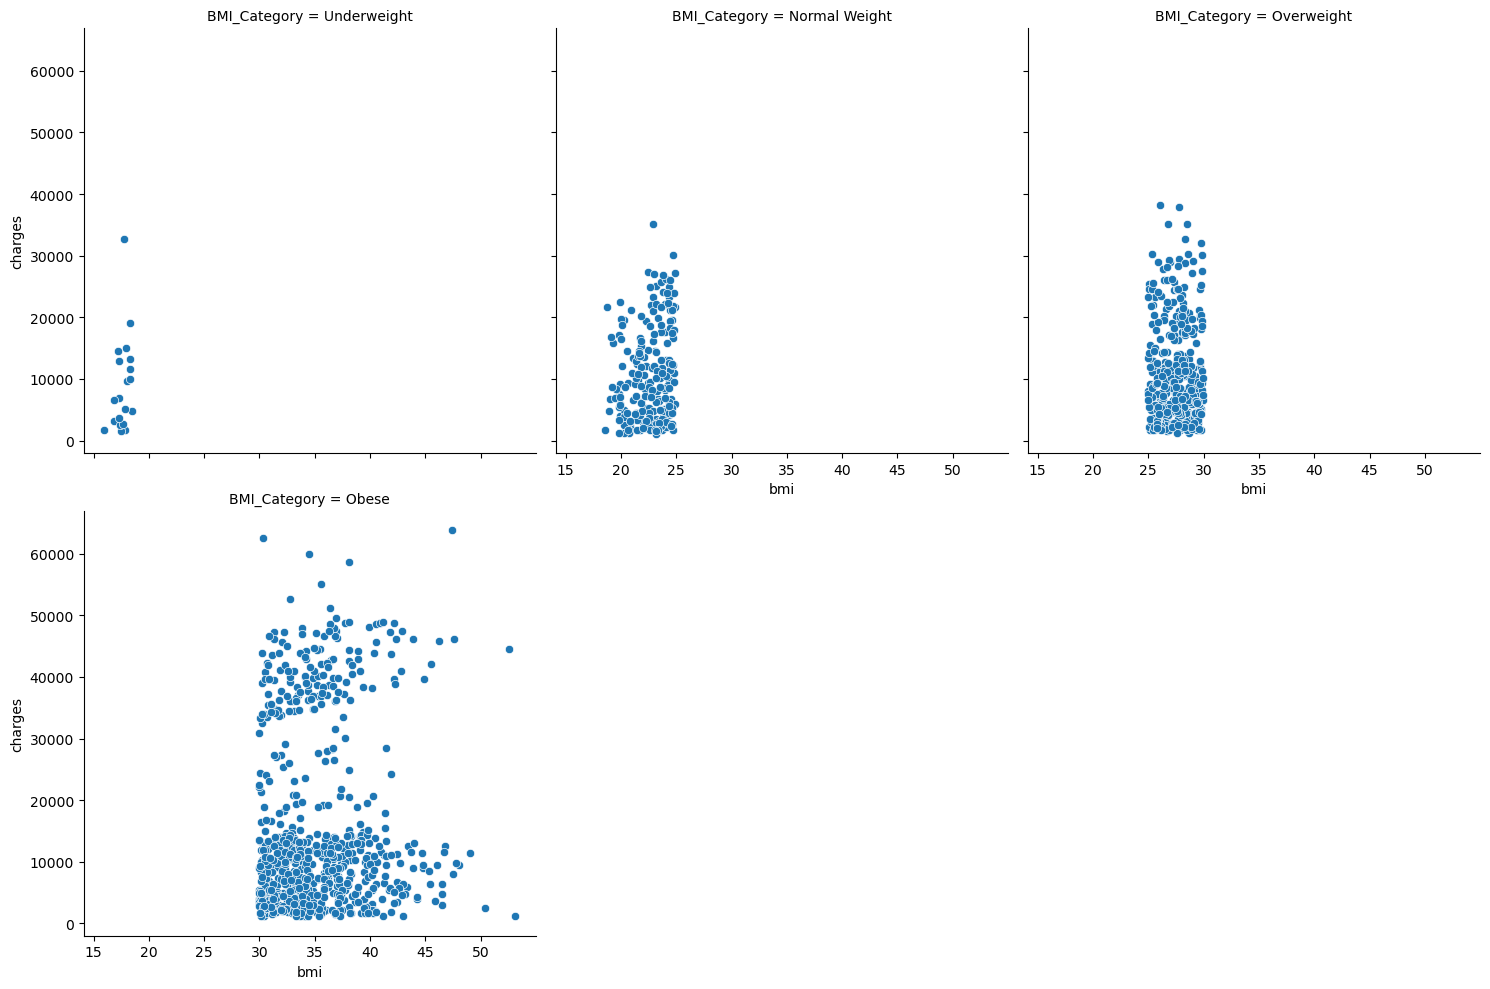

In [99]:
sns.relplot(data=ins_data, kind='scatter', x='bmi', y='charges', col='BMI_Category', col_wrap=3)

In [100]:
ins_data.groupby('BMI_Category').apply(lambda group: group['charges'].corr(group['bmi']))

BMI_Category
Underweight      0.348850
Normal Weight    0.174585
Overweight      -0.012224
Obese            0.067328
dtype: float64

In [101]:
# When grouping by BMI Category there is no strong correlation. 

### The relation between charges and smoker 

In [102]:
ins_data.groupby('smoker')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


<Axes: xlabel='smoker', ylabel='charges'>

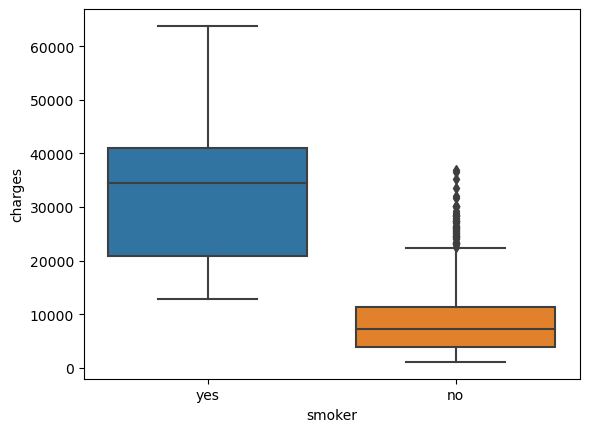

In [103]:
sns.boxplot(x='smoker', y='charges', data=ins_data)

In [104]:
#Smokers tend to have higher median insurance charges of $34,456 compared to non smokers $7,345
#Smokers face significantly higher charges.
#There is a strong relationship between smoker status and insurace charges with smokers having higher charges with 50% of
#smoker facing charges over $34,456 compared to non smokers that only the outliers pay more than $30,000 .

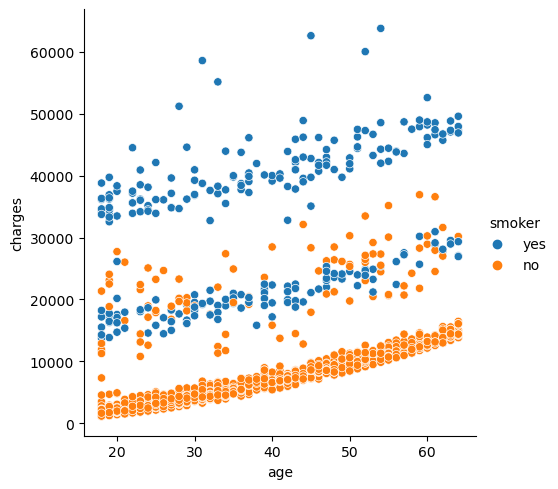

In [105]:
sns.relplot(data=ins_data, kind='scatter', x='age', y='charges', hue='smoker')

In [106]:
ins_data.groupby(['smoker','payment_group']).apply(lambda group: group['charges'].corr(group['age']))

smoker  payment_group
no      0-15000          0.930060
        15000-30000      0.052683
        30000-45000      0.094197
yes     0-15000          0.569806
        15000-30000      0.867468
        30000-45000      0.564831
        45000-60000     -0.440629
        60000+           0.001761
dtype: float64

In [107]:
# We see that there is a relationship within the payment groups for smokers and non-smokers.
# Within the 15000-30000 range the correlation coeffiecent of the smoker is 0.86 verses the non smokers witch is 0.05.
# Similar with 30000-45000 ranger. 
# Overall we see that smokers typically have higher hospital charges. 

### The relation between charges and region

In [108]:
ins_data.groupby('smoker')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


In [109]:
ins_data.groupby(['region']).apply(lambda group: group['charges'].corr(group['age']))

region
northeast    0.300951
northwest    0.337654
southeast    0.310593
southwest    0.258358
dtype: float64

<Axes: xlabel='region', ylabel='charges'>

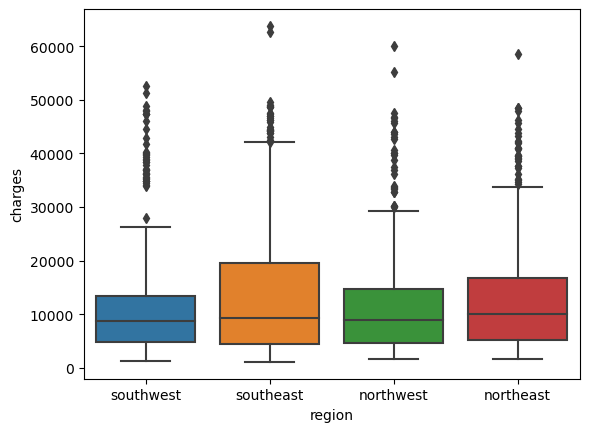

In [110]:
sns.boxplot(x='region', y='charges', data=ins_data)

In [111]:
#The data suggests that there is a sligh relationship between charges and region. 
#Insurance in the southeast region is higher, followed by the Northeast and Northwest. 
#The southwest region, on the other hand, has the lowest charges. 
#The highest charges in the Southeast and Northeast are notably higher. 
#All of this indicates that there must be potential factors influencing the charging costs specific to these regions. 

### The region with the largest percentage of obesity

<Axes: xlabel='region'>

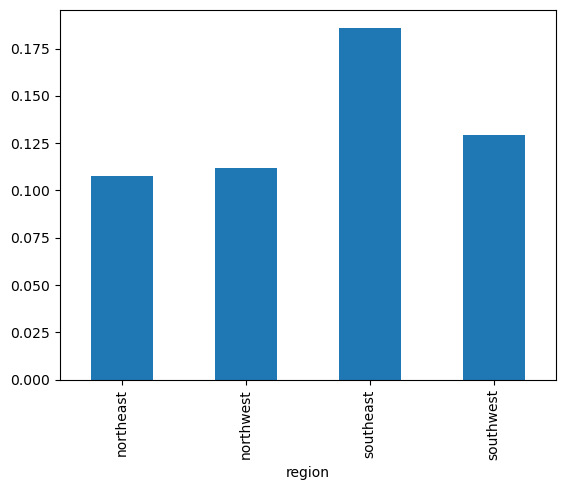

In [112]:
ins_data_per = (1/(ins_data.BMI_Category.count())) \
* ins_data.query('BMI_Category=="Obese"').groupby('region').BMI_Category.count()
ins_data_per.plot.bar()

In [113]:
# Southeast is the region with the largest percent of obesity. 

### Create a simple regression to show the relationship between charges and age.

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(ins_data[['age']], ins_data[['charges']], test_size=0.3, random_state=42)

In [115]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [116]:
y_predicted = model.predict(x_test)

prediction = pd.DataFrame(y_predicted, columns = ['PredictedCharges'])

combined = prediction.join([x_test.reset_index(drop=True), y_test.reset_index(drop=True)])

melted = pd.melt(combined, id_vars=['age'], value_vars=['charges', 'PredictedCharges'], var_name='charge_type', value_name='charge_value')

melted.head()

,age,charge_type,charge_value
0,45,charges,9095.06825
1,36,charges,5272.17580
2,64,charges,29330.98315
3,46,charges,9301.89355
4,19,charges,33750.29180


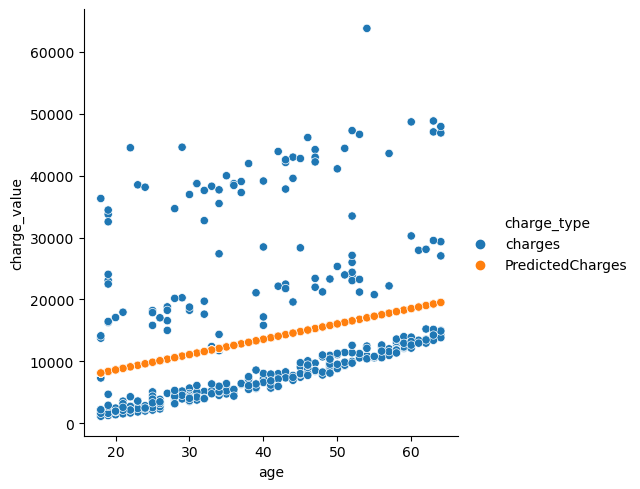

In [117]:
sns.relplot(data=melted, x='age', y='charge_value', hue='charge_type')

### How does this relationship change with smoking status?

In [118]:
#How does this relationship change with smoking status?
smoker_data = smokers_data = ins_data[ins_data['smoker'] == 'yes']
non_smoker_data = non_smokers_data = ins_data[ins_data['smoker'] == 'no']

x_smoker = smoker_data[['age']]
y_smoker = smoker_data[['charges']]

model_smoker = LinearRegression()
model_smoker.fit(x_smoker, y_smoker)
y_predicted_smoker = model_smoker.predict(x_smoker)

x_non_smoker = non_smoker_data[['age']]
y_non_smoker = non_smoker_data[['charges']]

model_non_smoker = LinearRegression()
model_non_smoker.fit(x_non_smoker, y_non_smoker)
y_predicted_non_smoker = model_non_smoker.predict(x_non_smoker)

prediction_smoker = pd.DataFrame(y_predicted_smoker, columns = ['PredictedCharges_sk'])
prediction_non_smoker = pd.DataFrame(y_predicted_non_smoker, columns = ['PredictedCharges_nonsk'])

combined_smoker = prediction_smoker.join([x_test.reset_index(drop=True), y_test.reset_index(drop=True)])
combined_non_smoker = prediction_non_smoker.join([x_test.reset_index(drop=True), y_test.reset_index(drop=True)])

melted_smoker = pd.melt(combined_smoker, id_vars=['age'], value_vars=['charges', 'PredictedCharges_sk'], var_name='charge_type', value_name='charge_value')
melted_non_smoker = pd.melt(combined_non_smoker, id_vars=['age'], value_vars=['charges', 'PredictedCharges_nonsk'], var_name='charge_type', value_name='charge_value')

Text(0.5, 1.02, 'Relationship between Age and Charges for Smokers')

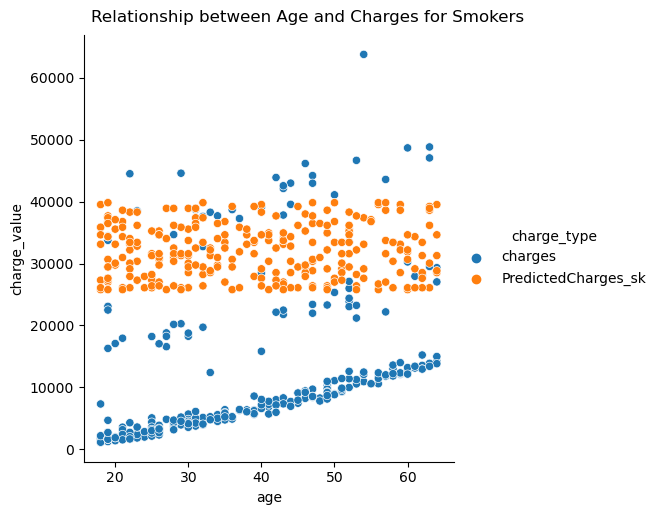

In [119]:
g = sns.relplot(data=melted_smoker, x='age', y='charge_value', hue='charge_type')
g.fig.suptitle("Relationship between Age and Charges for Smokers", y=1.02)

Text(0.5, 1.02, 'Relationship between Age and Charges for Non-Smokers')

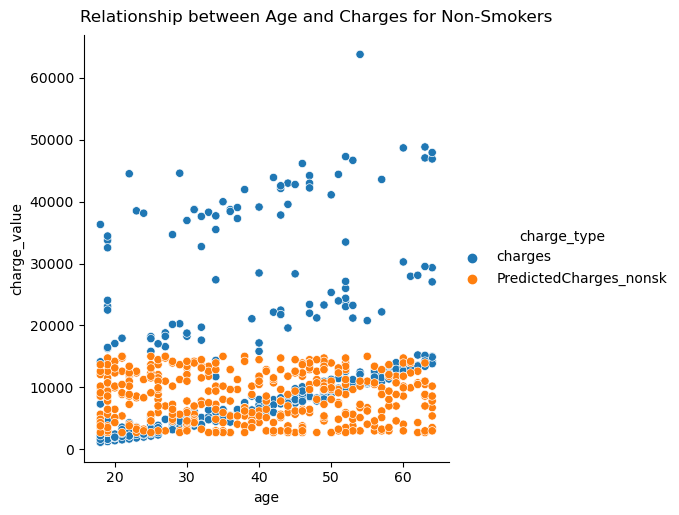

In [120]:
g = sns.relplot(data=melted_non_smoker, x='age', y='charge_value', hue='charge_type')
g.fig.suptitle("Relationship between Age and Charges for Non-Smokers", y=1.02)

### How does this relationship change with smoking status?

In [121]:
bmi_UW = ins_data[ins_data['BMI_Category'] == 'Underweight']
bmi_NW = ins_data[ins_data['BMI_Category'] == 'Normal Weight']
bmi_OW = ins_data[ins_data['BMI_Category'] == 'Overweight']
bmi_Ob = ins_data[ins_data['BMI_Category'] == 'Obese']


In [122]:
x_UW = bmi_UW[['age']]
y_UW = bmi_UW[['charges']]

model_UW = LinearRegression()
model_UW.fit(x_UW, y_UW)
y_predicted_UW = model_UW.predict(x_UW)

x_NW = bmi_NW[['age']]
y_NW = bmi_NW[['charges']]

model_NW = LinearRegression()
model_NW.fit(x_NW, y_NW)
y_predicted_NW = model_NW.predict(x_NW)

x_OW = bmi_OW[['age']]
y_OW = bmi_OW[['charges']]

model_OW = LinearRegression()
model_OW.fit(x_OW, y_OW)
y_predicted_OW = model_OW.predict(x_OW)

x_Ob = bmi_Ob[['age']]
y_Ob = bmi_Ob[['charges']]

model_Ob = LinearRegression()
model_Ob.fit(x_Ob, y_Ob)
y_predicted_Ob = model_Ob.predict(x_Ob)

prediction_UW = pd.DataFrame(y_predicted_UW, columns = ['PredictedCharges'])
prediction_NW = pd.DataFrame(y_predicted_NW, columns = ['PredictedCharges'])
prediction_OW = pd.DataFrame(y_predicted_OW, columns = ['PredictedCharges'])
prediction_Ob = pd.DataFrame(y_predicted_Ob, columns = ['PredictedCharges'])

combined_UW = prediction_UW.join([x_test.reset_index(drop=True), y_test.reset_index(drop=True)])
combined_NW = prediction_NW.join([x_test.reset_index(drop=True), y_test.reset_index(drop=True)])
combined_OW = prediction_OW.join([x_test.reset_index(drop=True), y_test.reset_index(drop=True)])
combined_Ob = prediction_Ob.join([x_test.reset_index(drop=True), y_test.reset_index(drop=True)])

melted_UW = pd.melt(combined_UW, id_vars=['age'], value_vars=['charges', 'PredictedCharges'], var_name='charge_type', value_name='charge_value')
melted_NW = pd.melt(combined_NW, id_vars=['age'], value_vars=['charges', 'PredictedCharges'], var_name='charge_type', value_name='charge_value')
melted_OW = pd.melt(combined_OW, id_vars=['age'], value_vars=['charges', 'PredictedCharges'], var_name='charge_type', value_name='charge_value')
melted_Ob = pd.melt(combined_Ob, id_vars=['age'], value_vars=['charges', 'PredictedCharges'], var_name='charge_type', value_name='charge_value')

Text(0.5, 1.02, 'Relationship between Age and Charges for Under Weight')

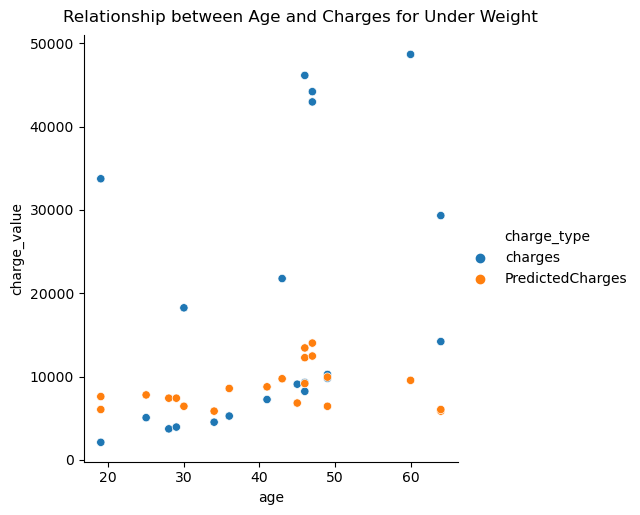

In [123]:
g = sns.relplot(data=melted_UW, x='age', y='charge_value', hue='charge_type')
g.fig.suptitle("Relationship between Age and Charges for Under Weight", y=1.02)


Text(0.5, 1.02, 'Relationship between Age and Charges for Normal Weight')

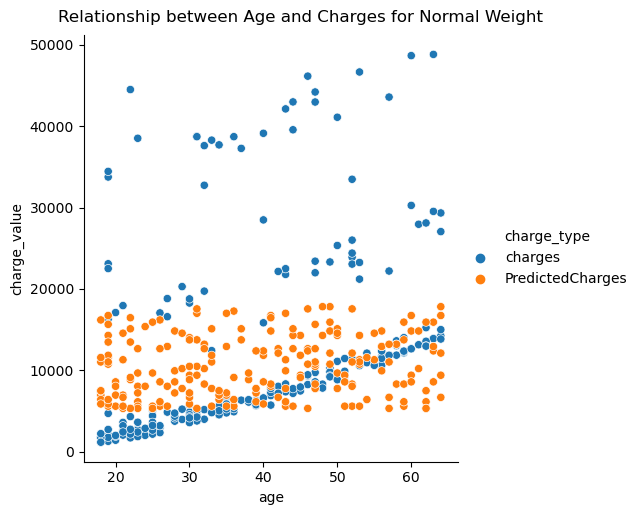

In [124]:
g = sns.relplot(data=melted_NW, x='age', y='charge_value', hue='charge_type')
g.fig.suptitle("Relationship between Age and Charges for Normal Weight", y=1.02)


Text(0.5, 1.02, 'Relationship between Age and Charges for Over Weight')

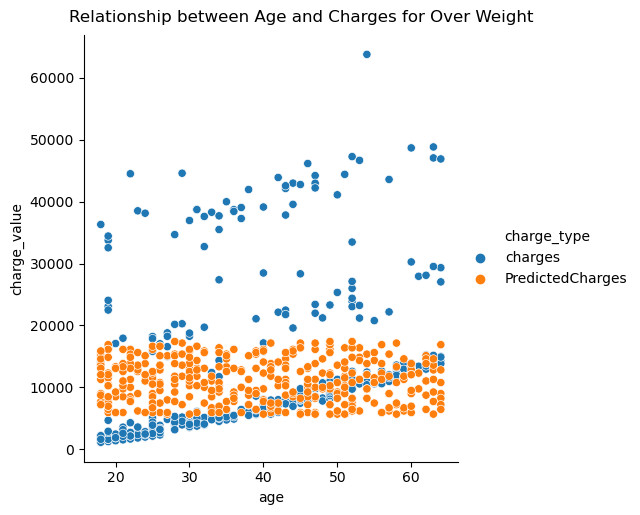

In [125]:
g = sns.relplot(data=melted_OW, x='age', y='charge_value', hue='charge_type')
g.fig.suptitle("Relationship between Age and Charges for Over Weight", y=1.02)

Text(0.5, 1.02, 'Relationship between Age and Charges for Obese')

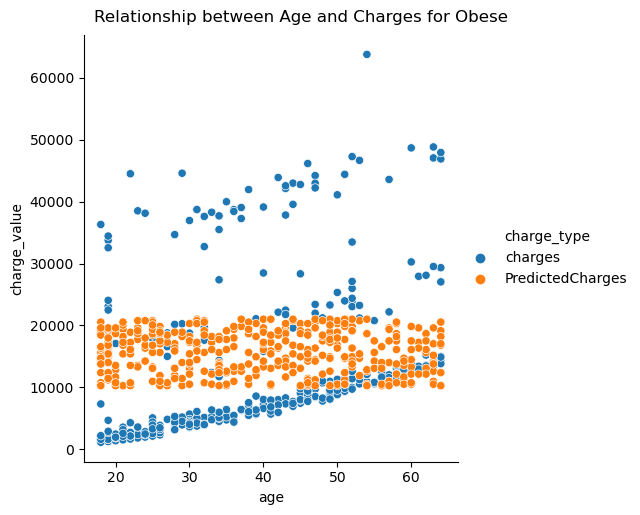

In [126]:
g = sns.relplot(data=melted_Ob, x='age', y='charge_value', hue='charge_type')
g.fig.suptitle("Relationship between Age and Charges for Obese", y=1.02)

### Multiple Regressions. 

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [128]:
ins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            1338 non-null   int64   
 1   sex            1338 non-null   object  
 2   bmi            1338 non-null   float64 
 3   children       1338 non-null   int64   
 4   smoker         1338 non-null   object  
 5   region         1338 non-null   object  
 6   charges        1338 non-null   float64 
 7   Cost           1338 non-null   object  
 8   payment_group  1338 non-null   object  
 9   BMI_Category   1338 non-null   category
dtypes: category(1), float64(2), int64(2), object(5)
memory usage: 95.7+ KB


### Multiple regression model

In [129]:
dum = pd.get_dummies(ins_data, columns=['sex','smoker','region','payment_group','BMI_Category'])
dum = dum.drop(columns=['Cost'])
dum.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,...,region_southwest,payment_group_0-15000,payment_group_15000-30000,payment_group_30000-45000,payment_group_45000-60000,payment_group_60000+,BMI_Category_Underweight,BMI_Category_Normal Weight,BMI_Category_Overweight,BMI_Category_Obese
0,19,27.900,0,16884.92400,True,False,False,True,False,False,...,True,False,True,False,False,False,False,False,True,False
1,18,33.770,1,1725.55230,False,True,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True
2,28,33.000,3,4449.46200,False,True,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,33,22.705,0,21984.47061,False,True,True,False,False,True,...,False,False,True,False,False,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,...,False,True,False,False,False,False,False,False,True,False


In [130]:
# First we create our dummie variables and store them 

In [131]:
numeric_columns = ['age','bmi','children','charges']
scaler = StandardScaler()
dum[numeric_columns] = scaler.fit_transform(dum[numeric_columns])
dum.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,...,region_southwest,payment_group_0-15000,payment_group_15000-30000,payment_group_30000-45000,payment_group_45000-60000,payment_group_60000+,BMI_Category_Underweight,BMI_Category_Normal Weight,BMI_Category_Overweight,BMI_Category_Obese
0,-1.438764,-0.453320,-0.908614,0.298584,True,False,False,True,False,False,...,True,False,True,False,False,False,False,False,True,False
1,-1.509965,0.509621,-0.078767,-0.953689,False,True,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True
2,-0.797954,0.383307,1.580926,-0.728675,False,True,True,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,-0.441948,-1.305531,-0.908614,0.719843,False,True,True,False,False,True,...,False,False,True,False,False,False,False,True,False,False
4,-0.513149,-0.292556,-0.908614,-0.776802,False,True,True,False,False,True,...,False,True,False,False,False,False,False,False,True,False


In [132]:
# Next we standardize the numeric variable

In [133]:
y = dum.charges
x = dum.drop(columns='charges') 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [134]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [135]:
# Create a linear regression 

## Making predictions

In [136]:
test_score = model.score(x_test, y_test)
test_score

0.9660681996312042

In [137]:
train_score = model.score(x_train, y_train)
train_score

0.9593339953962765

In [138]:
predictions = model.predict(x_test)
pred_df = pd.DataFrame({'Actual_charge':(y_test), 
                        'Predicted_charge': (predictions)})
pred_df.head()

,Actual_charge,Predicted_charge
764,-0.344914,-0.358079
887,-0.660713,-0.557904
890,1.326718,1.181165
1293,-0.327829,-0.404516
259,1.691784,1.716964


In [139]:
# Reverse the transformation into understandable numbers. 
actual_charges_transformed = (pred_df['Actual_charge'] * ins_data['charges'].std()) + ins_data['charges'].mean()
predicted_charges_transformed = (pred_df['Predicted_charge'] * ins_data['charges'].std()) + ins_data['charges'].mean()

combined = pd.DataFrame({
    'Actual_charges_transformed': actual_charges_transformed,
    'Predicted_charges_transformed': predicted_charges_transformed
})
combined.head()

,Actual_charges_transformed,Predicted_charges_transformed
764,9093.507078,8934.084944
887,5269.185242,6514.203085
890,29336.988221,27574.341980
1293,9300.409710,8371.726011
259,33757.949258,34062.870327


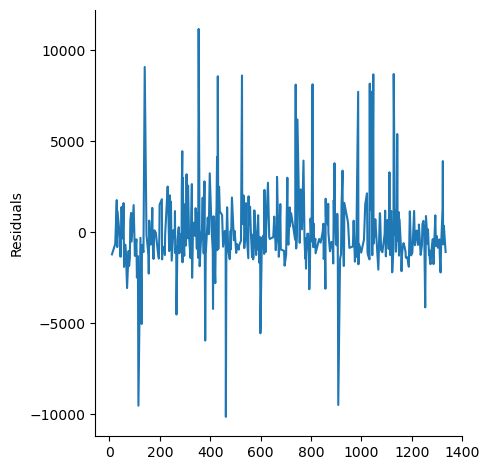

In [140]:
combined['Residuals'] = combined['Actual_charges_transformed'] - combined['Predicted_charges_transformed']
sns.relplot(data=combined.Residuals , kind='line')

In [141]:
# Generally speaking the model is good at making predictions. As most of the residuals fall around 0. However there are a few 
# outliers. These are probaly due to either some other medical condition that is not related to smoking or when re-standardizing 
# the variables. 

### Optimal Numbers of parameters

In [142]:
from sklearn.feature_selection import RFE

# Initialize the linear regression model
model = LinearRegression()

# Create empty lists to store results
num_features_list = []
test_scores = []
train_scores = []

# Define the range of features to test
for num_features in range(1, len(x.columns) + 1):
    # Create RFE model with the linear regression estimator
    rfe = RFE(model, n_features_to_select=num_features)
    # Fit the RFE model and transform the data
    x_rfe = rfe.fit_transform(x_train, y_train)
    
    # Train/test split on the selected features
    x_test_rfe = rfe.transform(x_test)
    
    # Fit a model on the selected features
    model.fit(x_rfe, y_train)
    
    # Append the number of features and corresponding scores
    num_features_list.append(num_features)
    test_scores.append(model.score(x_test_rfe, y_test))
    train_scores.append(model.score(x_rfe, y_train))


<Axes: xlabel='Number of Features', ylabel='Score'>

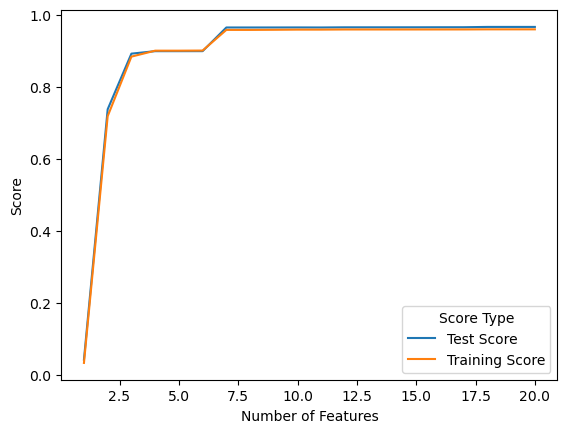

In [143]:
scores_df = pd.DataFrame({
    'Number of Features': num_features_list,
    'Test Score': test_scores,
    'Training Score': train_scores
})
scores_df_melted = scores_df.melt('Number of Features', var_name='Score Type', value_name='Score')
sns.lineplot(x='Number of Features', y='Score', hue='Score Type', data=scores_df_melted)

In [144]:
# We can see that there is a strong correlation coefficient when there are 2 varaibles but an even strong coefficient when there
# there 4. Furthermore the strongest is at 8. So Charges are significantly effected when there is a large jump upwards 
# in the graph. Age and BMI are the first two that cause a rise. Children are the third but have a less of a rise. The next 
# big rise happens when gender is taken into account and finally when being a smoker is taken into account. Overall, the factors
# that play the biggest role in hospital charges are age, BMI, number of children, gender, and if you are a smoker.  